<a href="https://colab.research.google.com/github/tarun-bandi/ml_notes/blob/main/Autograd_Micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

#

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

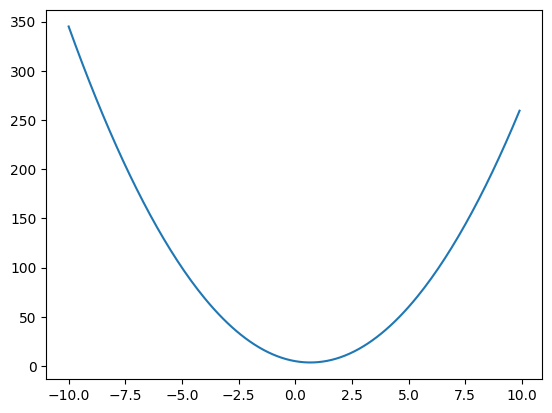

In [ ]:
xs = np.arange(-10, 10, 0.1)
ys = f(xs)
plt.plot(xs, ys)

Recall the definition of a derivative:

$$ f'(x) = \lim_{h → 0} \frac{f(x+h) - f(x)}{h}$$

In [ ]:
h = 0.00001
x = 2/3
(f(x + h) - f(x))/h #numerical approximation

3.0000002482211127e-05

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b**2 + c
print(d)

$$\frac{∂f}{∂x} = \lim_{h → 0} \frac{f(x + h, y) - f(x, y)}{h}$$

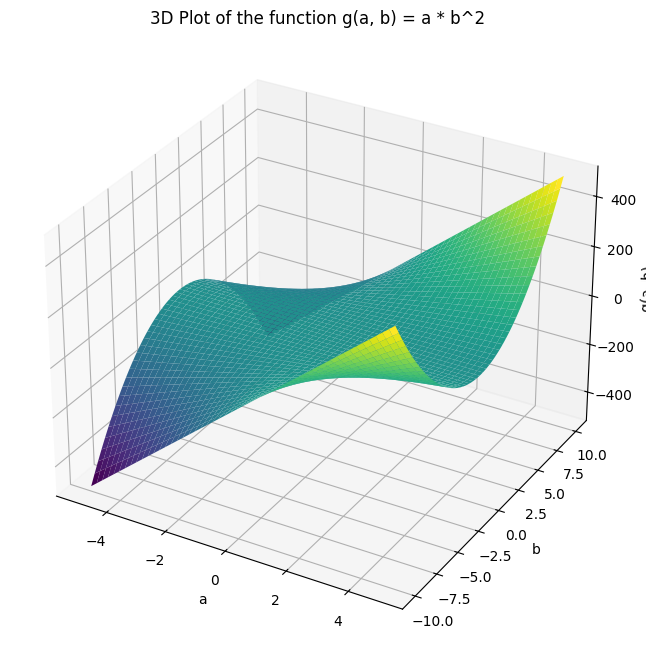

In [ ]:
def g(a, b):
  return a*b**2
from mpl_toolkits.mplot3d import Axes3D

a_values = np.arange(-5, 5, 0.01)
b_values = np.arange(-10, 10, 0.01)

# Create a meshgrid for a and b
A, B = np.meshgrid(a_values, b_values)

# Calculate g(a, b) for each (a, b) pair
G = g(A, B)

# Plot the function in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, G, cmap='viridis')

# Label axes
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('g(a, b)')
ax.set_title("3D Plot of the function g(a, b) = a * b^2")
plt.show()


In [ ]:


h = 0.00001
a = 2.0
b = -3.0
(g(a + h, b) - g(a, b))/h #b^2 is manually the derivative

9.000000000014552

In [ ]:
class Value:

  def __init__(self, data, _children = (), _op=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), "+")
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), "*")

a = Value(2.0)
b = Value(3.0)
c = Value(10.0)
d = a*b + c
d._prev

{Value(data=10.0), Value(data=6.0)}

In [40]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  return dot

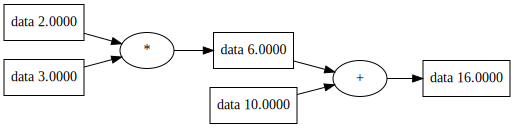

In [ ]:
draw_dot(d)